In [328]:
import numpy as np
from itertools import product
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

domain_start = 0
domain_end = 1
domain = np.arange(domain_start, domain_end, 0.01)

# Some Sample Functions for testing the interpolation in 1 and 2D
###################################################################
def gaussian( x_val ):
    output =  1/np.sqrt(2*np.pi)*np.exp(-(x_val-0.5)**2/2)
    return output

def quad( x_val ):
    output = -1*(x_val-0.5)**2+0.5**2
    return output

def quad_2D(x_val, y_val):
    #output = -1*((x_val-0.5)**2+(y_val-0.5)**2)+0.5**2
    output = -1*((x_val + y_val-0.5)**2)+0.5**2
    return output
###################################################################

# Some underlying functions needed for the interpolation
###################################################################
def build_hat(level, node, domain):
    mesh_size = 1/(2**(level))
    hat_function = np.zeros(len(domain))
    hat_function = 1 - np.abs(domain/mesh_size - node)
    for i in range(len(hat_function)):
        if hat_function[i]<0:
            hat_function[i] = 0        
    return hat_function

def find_coe_1D(level, node, func):
    mesh_size = 1/(2**(level))
    point1 = func(node*mesh_size)
    #print(node*mesh_size)
    point2 = func((node-1)*mesh_size)
    #print((node-1)*mesh_size)
    point3 = func((node+1)*mesh_size)
    #print((node+1)*mesh_size)
    
    coe = point1 - (point2+point3)/2
    return coe

def find_coe_2D(level1, level2, node1, node2, func):
    mesh_size1 = 1/(2**(level1))
    mesh_size2 = 1/(2**(level2))
    
    point = np.zeros(9)
    point[0] = func((node1)*mesh_size1,(node2)*mesh_size2)
    point[1] = func((node1-1)*mesh_size1,(node2)*mesh_size2) 
    point[2] = func((node1+1)*mesh_size1,(node2)*mesh_size2) 
    point[3] = func((node1)*mesh_size1,(node2-1)*mesh_size2) 
    point[4] = func((node1-1)*mesh_size1,(node2-1)*mesh_size2) 
    point[5] = func((node1+1)*mesh_size1,(node2-1)*mesh_size2) 
    point[6] = func((node1)*mesh_size1,(node2+1)*mesh_size2) 
    point[7] = func((node1-1)*mesh_size1,(node2+1)*mesh_size2) 
    point[8] = func((node1+1)*mesh_size1,(node2+1)*mesh_size2)
    print(point)
    
    coe = point[0]-(point[1]+point[2])/2
    print(coe)
    coe = coe -(1/2)*(point[3]-(point[4]+point[5])/2)
    print(-(1/2)*(point[3]-(point[4]+point[5])/2))
    #print(coe)
    coe = coe -(1/2)*(point[6]-(point[7]+point[8])/2)
    print(-(1/2)*(point[6]-(point[7]+point[8])/2))
    #print(coe)
    return coe
###################################################################

# Functions to create the dense grid interpolation via the hierarchical basis.
###################################################################
def dense_interpolation_1D(max_level, domain, func):  
    level = np.arange(1,max_level+1,1)
    func_approx = np.zeros(len(domain))
    
    for l in level:
        start_node = 1
        nodes = np.arange(start_node, 2**(l),2)
        for node in nodes:
            hat_hold = build_hat(l,node, domain)
            coe_hold = find_coe(l,node,func)
            plt.plot(domain, coe_hold*hat_hold) #To visualize hat functions.
            func_approx = func_approx + coe_hold*hat_hold  
    plt.show()                                  #To visualize hat functions.
    return func_approx

def dense_interpolation_2D(max_level, domain, func):
    
    #X,Y = np.meshgrid(domain,domain)
    #fig = plt.figure(figsize=plt.figaspect(2.));
    #ax = fig.add_subplot(1,1,1, projection='3d');
    
    
    level_single = np.arange(1,max_level+1,1)
    func_approx = np.zeros((len(domain),len(domain)))
    levels = list(product(level_single,level_single))
    print(levels)
    for level in levels:                  
            start_node = 1
            nodes1 = np.arange(start_node,2**(level[0]),2)
            nodes2 = np.arange(start_node,2**(level[1]),2)
            nodes = list(product(nodes1,nodes2))
            print(nodes)
            for node in nodes:           
                    hat_hold = np.outer(build_hat(level[0],node[0],domain),build_hat(level[1],node[1],domain))
                    #ax.plot_surface(X,Y,hat_hold, rstride=1, cstride=1) #To visualize hat functions.
                    
                    #coe_hold = find_coe_2D(level[0],level[1],node[0],node[1],func)
                    #print(coe_hold)
                    #func_approx = func_approx + coe_hold*hat_hold
    #plt.show()                                                         #To visualize hat functions.
    #return func_approx
###################################################################    
    
    

In [329]:
#dense_interpolation_2D(2,domain,quad_2D) #test
#mesh_size1 = 1/(2**(4))
#mesh_size2 = 1/(2**(4))

find_coe_2D(4,4,4,2,quad_2D)
#quad_2D((1)*mesh_size1,(2)*mesh_size2)

[ 0.234375    0.21484375  0.24609375  0.21484375  0.1875      0.234375
  0.24609375  0.234375    0.25      ]
0.00390625
-0.001953125
-0.001953125


0.0

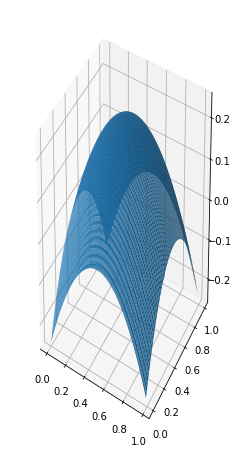

In [280]:
# Testing 3D plots.
X,Y = np.meshgrid(domain,domain)
#Z = np.outer(build_hat(1,1,domain),build_hat(2,1,domain))
Z = quad_2D(X,Y)

fig = plt.figure(figsize=plt.figaspect(2.));
ax = fig.add_subplot(1,1,1, projection='3d');
ax.plot_surface(X,Y,Z, rstride=1, cstride=1)
plt.show()

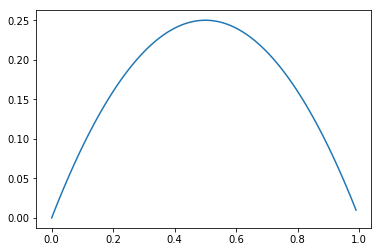

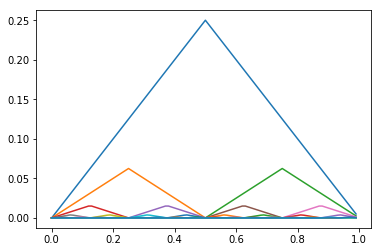

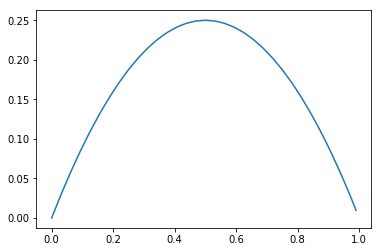

In [297]:
# Sample of 1D dense interpolation.
plt.plot(domain, quad(domain))
plt.show()

y = dense_interpolation(6,domain,quad)

plt.plot(domain,y)
plt.show()